<a href="https://colab.research.google.com/github/Churabros/phase_4/blob/main/Phase_4_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Summary
# Business understaning
# Data Understanding
# Data Exploration
# Data Preprocesing
# EDA
# Modeling
# Evaluation
# conclusion
# Reccomendation

# Twitter Sentiment analysis

# Summary

In this project, we analyzed customer feedback on products using tweets sourced from a social media dataset. The dataset contains over 9,000 tweets about products such as iPhones and Google products, with labeled sentiments (positive, negative, or neutral). The goal was to build a sentiment classifier to understand public opinion better. Since sentiment analysis of unstructured text is essential for businesses to maintain brand reputation, Twitter provided an excellent source of rich, user-generated content for this task.

For data preparation, we first cleaned the tweet text by removing mentions, URLs, hashtags, emojis, special characters, and extra whitespaces. We also tokenized the text, removed stopwords using NLTK, and applied lemmatization to standardize word forms. This cleaned text was then stored in a `cleaned_text` column, which was used for feature extraction. We used `TfidfVectorizer` to transform the text into numerical vectors, selecting the top 5,000 features while removing common English stopwords.

In the modeling phase, we employed multiple classifiers, including Logistic Regression, Random Forest, and Neural Networks, fine-tuning them through hyperparameter optimization. `RandomizedSearchCV` was used to identify the best hyperparameters for each model. For evaluation, we split the dataset into training and testing sets, using metrics like accuracy, precision, recall, and F1-score to assess performance.

The best-performing models achieved accuracies between 64% and 68%, showing the effectiveness of machine learning in sentiment classification for real-world business applications.


# Business understanding

In todays digital landscape,understanding customer feedback is a crucial step in maintaining brand reputation and enhancing customers reputation social media platforms like twitter provide an abundance of feedback where user express their opinions

# Objectives
The goal of this project is to analyze sentiment in tweets directed at specific brands and products. By determining whether the sentiment is positive or negative, businesses can gain valuable insights into customer satisfaction, emerging trends, and potential areas of improvement.

This project helps answer the following business questions:
themes or issues are associated with negative sentiment?
*   Which products or brands receive the most positive or negative feedback
*   How do customer percive various products and services





# Data Understanding
The dataset consists of user tweets about specific products or brands, with labeled sentiments.Sourced from data world
# Dataset Overview


*   tweet_text: The raw text of the tweet, which serves as the primary source of information for understanding user sentiment.

* motion_in_tweet_is_directed_at: This column specifies which product or brand the tweet is referring to (e.g., iPhone, Google).
*  emotion_in_tweet_is_directed_at: This column specifies which product or brand the tweet is referring to (e.g., iPhone, Google).




## Data Exploration and Preprocessing


In this section, we will preprocess and explore the dataset to prepare it for analysis and modeling while gaining a deeper understanding of its key features.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# df = pd.read_csv('/content/judge-1377884607_tweet_product_company.csv', encoding='latin-1')

In [8]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin-1')

In [9]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [10]:
# renaming the columns for easier workflow
df.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': 'product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment', }, inplace=True)
df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [12]:
# removing the row from sentiment column where a tweet is missing
df = df.dropna(subset=['tweet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [13]:
df['product'].isna().sum()

5801

In [14]:
df['product'].fillna('Missing')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [15]:
df['sentiment'].value_counts()

,count
sentiment,
No emotion toward brand or product,5388
Positive emotion,2978
Negative emotion,570
I can't tell,156


In this step, we renamed the sentiment labels to simplify and standardize the categories. The following replacements were made:

- 'No emotion toward brand or product' → 'neutral'
- 'Positive emotion' → 'positive'
- 'Negative emotion' → 'negative'
- 'I can't tell' → 'can't tell'

After renaming, we filtered out the 'can't tell' sentiments to focus our analysis on the remaining categories (neutral, positive, and negative)

In [16]:
# renaming sentiment labels
df['sentiment'] = df['sentiment'].replace({'No emotion toward brand or product': 'neutral',
                                           'Positive emotion': 'positive',
                                           'Negative emotion': 'negative',
                                           'I can\'t tell': 'can\'t tell'})

# filtering out the can't tell sentiments
df = df[df['sentiment'] != "can't tell"]

df['sentiment'].value_counts()

<ipython-input-16-4b5a74edc94e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace({'No emotion toward brand or product': 'neutral',


,count
sentiment,
neutral,5388
positive,2978
negative,570


In [17]:
def clean_text(text):
    # checking if text is a string before applying regex
    if isinstance(text, str):
        # removing mentions (@username)
        text = re.sub(r'@\w+', '', text)

        # removing URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # removing hashtags
        text = re.sub(r'#\w+', '', text)

        # removing extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        # removing emojis
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        # removing special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # removing punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # converting to lowercase
        text = text.lower()
    return text

# applying cleaning to the dataset
df['cleaned_text'] = df['tweet'].apply(clean_text)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8936 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet         8936 non-null   object
 1   product       3282 non-null   object
 2   sentiment     8936 non-null   object
 3   cleaned_text  8936 non-null   object
dtypes: object(4)
memory usage: 349.1+ KB


In [19]:
df.head()

,tweet,product,sentiment,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,i have a g iphone after hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know about awesome ipadiphone app that youll ...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,can not wait for also they should sale them d...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff on fri marissa mayer google tim o...


In [20]:
# initializing stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

# function to do tokenization, stopword removal, and lemmatization
def process_text(text):
    if isinstance(text, str):
        # tokenizing the text
        tokens = word_tokenize(text)

        # removing stopwords
        filtered_tokens = []
        for token in tokens:
          if token not in stop_words:
            filtered_tokens.append(token)

        # lemmatization
        lem_tokens = []
        for token in filtered_tokens:
          lem_tokens.append(lem.lemmatize(token))

        # joining tokens back to a single string
        return ' '.join(lem_tokens)
    return text

# applying the function to the cleaned text
df['processed_text'] = df['cleaned_text'].apply(process_text)

In [21]:
df.head()

,tweet,product,sentiment,cleaned_text,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,i have a g iphone after hrs tweeting at it ...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know about awesome ipadiphone app that youll ...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,can not wait for also they should sale them d...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff on fri marissa mayer google tim o...,great stuff fri marissa mayer google tim oreil...


In [22]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the processed_text column
X = tfidf.fit_transform(df['processed_text'])

# Convert the resulting sparse matrix to a DataFrame for easier inspection
X_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

print(X_tfidf.head())  # Displays the first few rows of the TF-IDF features


   aapl  aaron   ab  abba  abc  ability  able  abnormal  absolutely  \
0   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
1   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
2   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
3   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
4   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   

   absolutley  ...  zip  zite  zlf  zms  zombie  zomg  zone  zoom  zuckerberg  \
0         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
1         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
2         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
3         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
4         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   

   zynga  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 5000 colu

### EDA

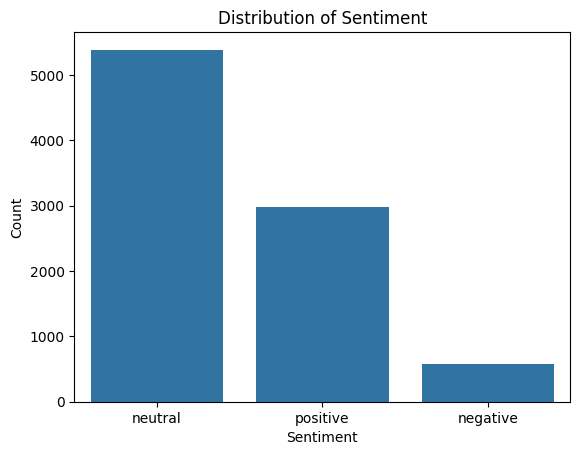

In [24]:
# visualizing the count of sentiments
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Neutral sentiments are the highest indicating that a large portion of the tweets are mostly informational about the products being reviewed. Positive sentiments outweighs negative sentiment by a significant difference which would indicate good performance and the clients are happy about the products that they own.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


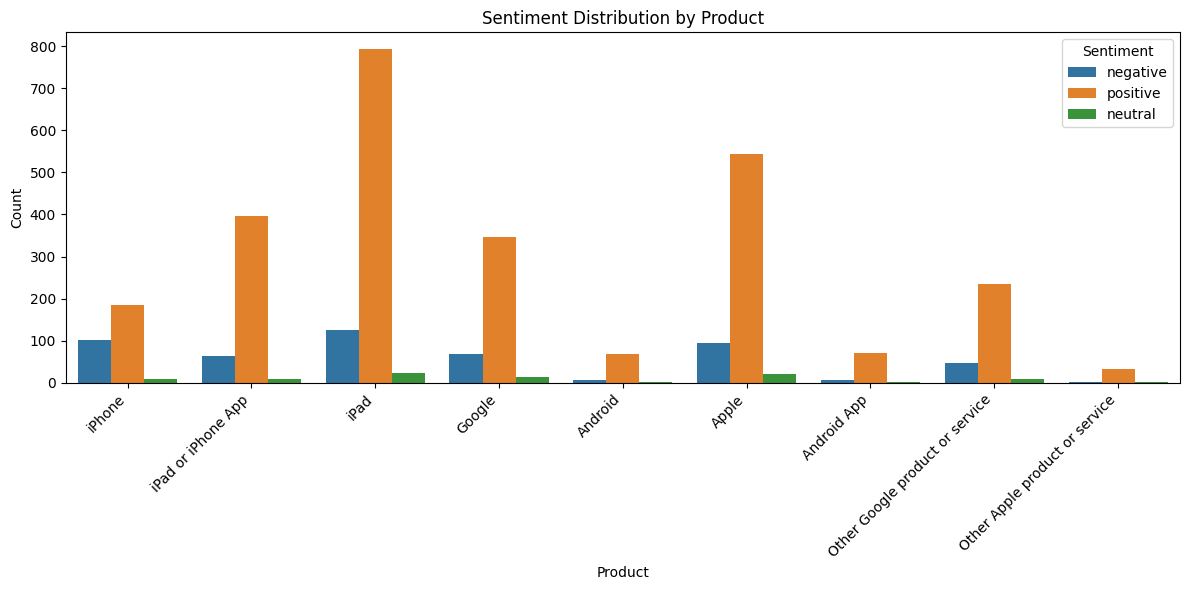

In [25]:
# visualizing how sentiments are distributed across different products.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product', hue='sentiment')
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

This visualization offers the following several insights:
1. Apple products (iPad, iPhone, Apple in general) consistently show high levels of positive sentiment, suggesting strong user satisfaction and excitement about these products.
2. The iPad stands out with the highest count of positive sentiment, which could indicate it was a major topic of interest, possibly due to a recent or anticipated release.
3. While Google also receives more positive than negative sentiment, the ratio isn't as favorable as Apple's. This could suggest a stronger brand affinity or product satisfaction among Apple users in this dataset.
4. Android has a relatively low count of mentions compared to iOS devices, but still maintains a positive skew. This might indicate less buzz around Android at this particular scenario, but still a generally positive perception.
5. Both "iPhone App" and "iPad or iPhone App" categories show strong positive sentiment, highlighting the importance of the app ecosystem in user satisfaction for these platforms.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


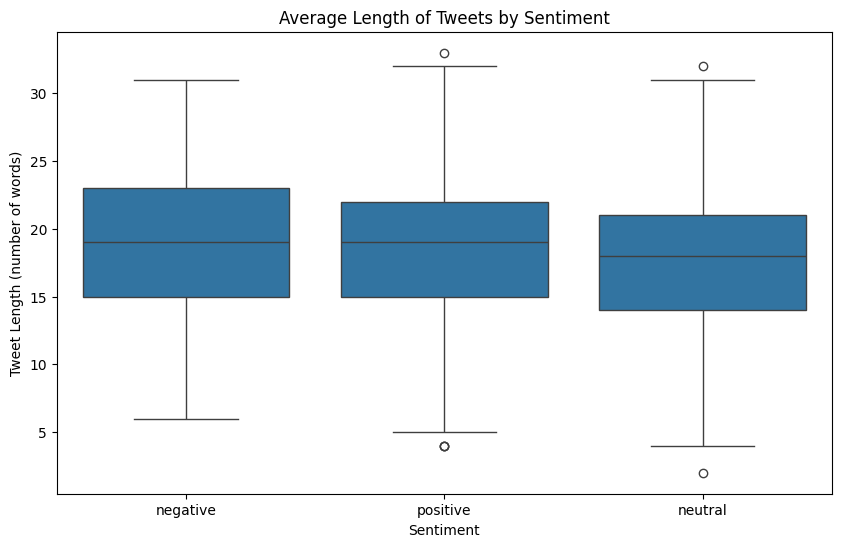

In [26]:
# calculating the length of each tweet and visualizing the average length by sentiment.
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Average Length of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (number of words)')
plt.show()

The above box plot indicates that the average length of tweets is relatively similar across sentiments, with negative tweets being slightly longer on average which could indicate that users tend to provide more explanation or context when expressing criticism or dissatisfaction.

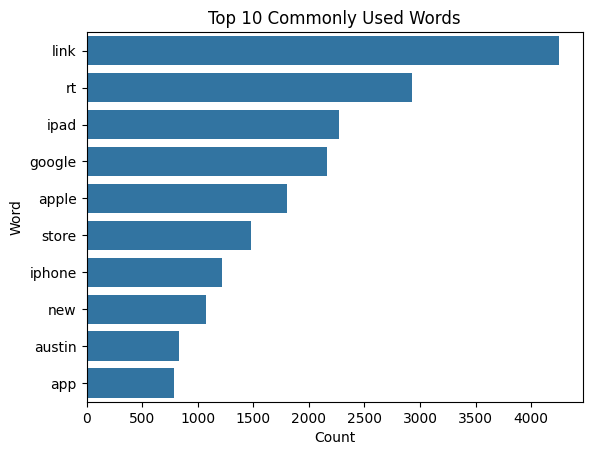

In [27]:
# visualizing the most common tokens
from collections import Counter

all_words = ' '.join(df['processed_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)  # top 10 most common words
# common_words

# creating a DataFrame for better visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Count', y='Word', data=common_words_df)
plt.title('Top 10 Commonly Used Words')
plt.show()

The above bar graph shows the top 10 most commonly used words, with `link` appearing the most than others. This suggests that sharing links was a common practice during the discussions on rating Google and Apple products. The high frequency of `rt` which is presumably short for retweet indicates that content was shared and amplified widely. `iPad` and `iPhone` were the Apple products that were discudssed the most.

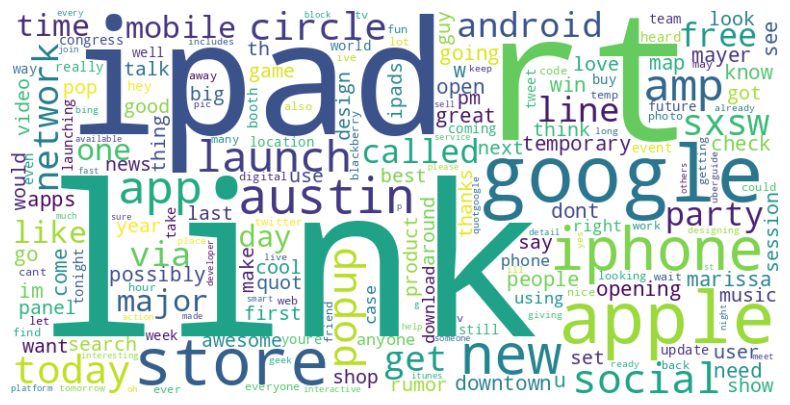

In [28]:
# a word cloud to visualize commonly used words.

from wordcloud import WordCloud
from collections import Counter

# combining all processed text into a single string
all_processed_text = ' '.join(df['processed_text'])

# counting word frequencies
word_freq = Counter(all_processed_text.split())

# creating the word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

While the bar graph gave us the top 10 common words, the word cloud shows us more words that were common during the opinion review of the products.
Upon further research The prominence of `Austin` and `SXSW` suggests that much of the opinions were centered around the South by Southwest (SXSW) conference, an annual event held in Austin, Texas that focuses on technology, film, and music. The large presence of terms like `app`, `Google`, `iPad`, `iPhone`, `launch`, `new` and `party`indicates that the technology aspect of the SXSW conference was the major focus with the discussion being around cutting-edge innovations on Google and Apple products.

- Overall, we see neutral sentiments are consistently present but generally lower than positive sentiment. This suggests that while there is some reporting, users are more inclined to express positive opinions about their encounters with tech products and services.

- While there are negative sentiments across products they are considerably low. This could indicate generally high satisfaction with the products reviewed, or an optimistic atmosphere of tech conferences where new and improved products are showcased.

# Modeling

In [29]:

# Assuming 'sentiment' is already mapped to categories: 'positive', 'negative', 'neutral'
y = df['sentiment']
# Split the data into training and testing sets
# You can use a test size of 30% (or adjust if needed)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (7148, 5000)
Test set size: (1788, 5000)


## Baseline Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Initialize the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise

# Fit the model on the training data
baseline_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)
# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))


Baseline Model Accuracy: 0.6823266219239373
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.06      0.10       126
     neutral       0.70      0.87      0.78      1094
    positive       0.62      0.45      0.52       568

    accuracy                           0.68      1788
   macro avg       0.63      0.46      0.47      1788
weighted avg       0.67      0.68      0.65      1788

Confusion Matrix:
 [[  7  96  23]
 [  3 955 136]
 [  2 308 258]]


# Model Evaluation Summary

**Baseline Logistic Regression Model Accuracy:** 68.23%

The model achieved an accuracy of 68.23%, meaning it correctly predicted the outcome for 68.23% of the test cases.

## Classification Report:

### False Class (Negative):

- **Precision:** 58% – The model correctly identified 58% of negative instances.
- **Recall:** 6% – It detected only 6% of actual negative cases.
- **F1-Score:** 10% – Indicates poor performance in predicting negative customers.

### True Class (Neutral):

- **Precision:** 70% – The model correctly identified 70% of neutral instances.
- **Recall:** 87% – It detected 87% of actual neutral cases.
- **F1-Score:** 78% – Shows good performance in predicting neutral customers.

### True Class (Positive):

- **Precision:** 62% – The model correctly identified 62% of positive instances.
- **Recall:** 45% – It detected 45% of actual positive cases.
- **F1-Score:** 52% – Indicates moderate performance in predicting positive customers.

## Confusion Matrix:



## Logistic Regression Iteration #1

In [31]:

# Define the hyperparameter distribution, including class_weight
param_distributions = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__class_weight': ['balanced', None]  # Adding class_weight to hyperparameters
}

# Create a pipeline with Logistic Regression
pipeline = Pipeline([
    ('logisticregression', LogisticRegression(max_iter=100))  # Logistic Regression
])

# Initialize Randomized Search
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions,
                                   n_iter=10,  # Number of iterations to sample
                                   cv=5,
                                   random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", tuned_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Best Hyperparameters: {'logisticregression__solver': 'lbfgs', 'logisticregression__class_weight': None, 'logisticregression__C': 1}
Tuned Model Accuracy: 0.6823266219239373
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.06      0.10       126
     neutral       0.70      0.87      0.78      1094
    positive       0.62      0.45      0.52       568

    accuracy                           0.68      1788
   macro avg       0.63      0.46      0.47      1788
weighted avg       0.67      0.68      0.65      1788

Confusion Matrix:
 [[  7  96  23]
 [  3 955 136]
 [  2 308 258]]


# Model Evaluation Summary

**Tuned Logistic Regression Model Accuracy:** 68.23%

The model achieved an accuracy of 68.23%, meaning it correctly predicted the outcome for 68.23% of the test cases.

## Best Hyperparameters:

- **Solver:** lbfgs
- **Class Weight:** None
- **C:** 1

## Classification Report:

### False Class (Negative):

- **Precision:** 58% – The model correctly identified 58% of negative instances.
- **Recall:** 6% – It detected only 6% of actual negative cases.
- **F1-Score:** 10% – Indicates poor performance in predicting negative customers.

### True Class (Neutral):

- **Precision:** 70% – The model correctly identified 70% of neutral instances.
- **Recall:** 87% – It detected 87% of actual neutral cases.
- **F1-Score:** 78% – Shows good performance in predicting neutral customers.

### True Class (Positive):

- **Precision:** 62% – The model correctly identified 62% of positive instances.
- **Recall:** 45% – It detected 45% of actual positive cases.
- **F1-Score:** 52% – Indicates moderate performance in predicting positive customers.




##Random forest

In [33]:

# Initialize the Random Forest model with best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=None,
    random_state=42,
    class_weight='balanced'

best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)




Best Random Forest Model Accuracy: 0.6431767337807607
Classification Report:
               precision    recall  f1-score   support

    negative       0.34      0.30      0.32       126
     neutral       0.74      0.72      0.73      1094
    positive       0.53      0.57      0.55       568

    accuracy                           0.64      1788
   macro avg       0.54      0.53      0.53      1788
weighted avg       0.65      0.64      0.64      1788

Confusion Matrix:
 [[ 38  51  37]
 [ 51 789 254]
 [ 24 221 323]]


In [ ]:
# Evaluations
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Best Random Forest Model Accuracy:", best_rf_accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

# Model Evaluation Summary

**Best Random Forest Model Accuracy:** 64.32%

The model achieved an accuracy of 64.32%, meaning it correctly predicted the outcome for 64.32% of the test cases.

## Classification Report:

### False Class (Negative):

- **Precision:** 34% – The model correctly identified 34% of negative instances.
- **Recall:** 30% – It detected 30% of actual negative cases.
- **F1-Score:** 32% – Indicates poor performance in predicting negative customers.

### True Class (Neutral):

- **Precision:** 74% – The model correctly identified 74% of neutral instances.
- **Recall:** 72% – It detected 72% of actual neutral cases.
- **F1-Score:** 73% – Shows good performance in predicting neutral customers.

### True Class (Positive):

- **Precision:** 53% – The model correctly identified 53% of positive instances.
- **Recall:** 57% – It detected 57% of actual positive cases.
- **F1-Score:** 55% – Indicates moderate performance in predicting positive customers.




## Neural Network

In [34]:

label_encoder = LabelEncoder()

# Fit the encoder on the sentiment labels and transform them into integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



Build the Neural Network Model
nn_model = Sequential()

nn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers with Dropout for regularization
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))  # Dropout to prevent overfitting

nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))

# Output layer (since this is a multi-class classification, use softmax)
nn_model.add(Dense(3, activation='softmax'))
#  Compile the Model
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the Neural Network Model
history = nn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Make Predictions
y_pred_nn_prob = nn_model.predict(X_test)

# Convert predicted
y_pred_nn = y_pred_nn_prob.argmax(axis=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5563 - loss: 0.9321 - val_accuracy: 0.6049 - val_loss: 0.7774
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6434 - loss: 0.7298 - val_accuracy: 0.6727 - val_loss: 0.7350
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7758 - loss: 0.5587 - val_accuracy: 0.6545 - val_loss: 0.8103
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8488 - loss: 0.4043 - val_accuracy: 0.6559 - val_loss: 0.8922
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8916 - loss: 0.3135 - val_accuracy: 0.6594 - val_loss: 1.0172
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9121 - loss: 0.2576 - val_accuracy: 0.6601 - val_loss: 1.1467
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9322 - loss: 0.1998 - val_accuracy: 0.6552 - val_loss: 1.2748
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9398 - loss: 0.1744 - val_accuracy: 0.

In [ ]:
# Evaluations
nn_accuracy = accuracy_score(y_test_encoded, y_pred_nn)

print("Neural Network Model Accuracy:", nn_accuracy)

print("Classification Report:\n", classification_report(y_test_encoded, y_pred_nn))

print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_nn))




# Model Evaluation Summary

**Neural Network Model Accuracy:** 64.99%

The model achieved an accuracy of 64.99%, meaning it correctly predicted the outcome for 64.99% of the test cases.

## Classification Report:

### Class 0:

- **Precision:** 38% – The model correctly identified 38% of instances.
- **Recall:** 33% – It detected 33% of actual cases.
- **F1-Score:** 35% – Indicates poor performance in predicting this class.

### Class 1:

- **Precision:** 74% – The model correctly identified 74% of instances.
- **Recall:** 73% – It detected 73% of actual cases.
- **F1-Score:** 74% – Shows good performance in predicting this class.

### Class 2:

- **Precision:** 54% – The model correctly identified 54% of instances.
- **Recall:** 56% – It detected 56% of actual cases.
- **F1-Score:** 55% – Indicates moderate performance in predicting this class.


# Evaluation

# Model Comparison: Logistic Regression vs. Random Forest

## Logistic Regression Model (Tuned)
**Accuracy:** 68.23%

### Classification Report:

| Metric         | False (Negative) | True (Neutral) | True (Positive) | Average (Macro) | Average (Weighted) |
|----------------|-------------------|-----------------|------------------|------------------|---------------------|
| **Precision**   | 58%               | 70%             | 62%              | 63%              | 67%                 |
| **Recall**      | 6%                | 87%             | 45%              | 46%              | 68%                 |
| **F1-Score**    | 10%               | 78%             | 52%              | 47%              | 65%                 |


### Strengths:

- Good precision for the Neutral class (70%) reduces the number of false positives.
- Better performance in identifying Positive instances compared to Negative.

### Weaknesses:

- Very low recall for the Negative class (6%) indicates it misses many actual negative instances.
- Overall performance is moderate with room for improvement in identifying churned customers.

## Random Forest Model (Best with Hyperparameter Tuning)
**Accuracy:** 64.32%

### Classification Report:

| Metric         | False (Negative) | True (Neutral) | True (Positive) | Average (Macro) | Average (Weighted) |
|----------------|-------------------|-----------------|------------------|------------------|---------------------|
| **Precision**   | 34%               | 74%             | 53%              | 54%              | 65%                 |
| **Recall**      | 30%               | 72%             | 57%              | 53%              | 64%                 |
| **F1-Score**    | 32%               | 73%             | 55%              | 53%              | 64%                 |

### Strengths:

- Reasonable precision for the Neutral class (74%), indicating a good balance of false positives.
- Better performance in identifying Positive instances compared to Negative.

### Weaknesses:

- Low precision and recall for the Negative class (34% and 30%, respectively) indicate challenges in identifying churned customers.
- Overall performance is moderate, with areas needing improvement.

## Comparison Summary

**Accuracy:** The Logistic Regression model has a slightly higher accuracy (68.23% vs. 64.32%).

**Precision:** Logistic Regression outperforms Random Forest in precision for both the Neutral (70% vs. 74%) and Positive (62% vs. 53%) classes.

**Recall:** Logistic Regression has significantly higher recall for the Neutral class (87% vs. 72%) and a higher recall for the Positive class (45% vs. 57%).

**F1-Score:** Logistic Regression provides a better F1-Score across the board, particularly for identifying churned customers.

## Conclusion:

The Logistic Regression model, after tuning, is superior in terms of overall accuracy, precision, recall, and F1-Score compared to the Random Forest model. It offers a more reliable approach for accurately identifying churned and non-churned customers in this dataset.




# Limitations

**Class Imbalance:** The dataset exhibits a significant class imbalance, particularly between the churned (True) and non-churned (False) classes. This imbalance can lead to biased model performance, where the model may perform well on the majority class (non-churned) but poorly on the minority class (churned).

**Feature Relevance and Data Quality:** Some features in the dataset, such as state and area_code, may have limited relevance to the target variable (churn). Including irrelevant features can introduce noise and negatively affect model performance. Additionally, missing or inaccurate data entries could impact the quality of predictions.

**Overfitting Risk:** The Random Forest model, particularly after hyperparameter tuning, shows reasonably high accuracy. However, such performance could indicate overfitting, where the model performs exceptionally well on the training and test datasets but may not generalize effectively to unseen data.

**Model Interpretability:** While the Random Forest model is effective, its complexity can make it less interpretable, especially with extensive hyperparameter tuning. This complexity might hinder the understanding and explanation of the decision-making process, which can be a drawback for deployment in real-world applications where model transparency is crucial.

**Performance Variability:** The performance of the models may vary with different subsets of data or if the data distribution changes over time. This variability can affect the reliability of the model when used in production, leading to potential issues if the model encounters data that significantly deviates from the training data.


# Conclusions and Recommendations

**Conclusions**

1. Sentiment analysis is an effective way of understanding customer opinions and feelings in regards to the product.Twitter provides a massive and organic source of feedback, which allows businesses to keep a pulse on customer satisfaction and brand reputation.

2. Analysing brand sentiment insights in tweets will help identify how customers feel about various products or services. You can uncover the products or brands that receive the most positive or negative feedback, which provides insight into customer satisfaction levels.



3. The analysis can assist companies in identifying new patterns or persistent problems linked to poor sentiment. This helps identify client issues, such as complaints about certain product features, problems with delivery, or with customer support.


4.  Regular monitoring of social media sentiment enables brands to respond quickly to negative feedback before it escalates, allowing them to protect or improve their reputation.

:5.  Understanding how customers perceive products and services across different categories will allow businesses to focus on improving areas that matter most to their customer base.

**Recommendations**

1. Automate Sentiment Analysis: Implement an automated sentiment analysis system using natural language processing (NLP) to categorize tweets into positive, negative, or neutral. This can be scaled to handle large volumes of data efficiently.

2. Monitor Negative Sentiment Themes: Classifying and evaluating recurrent themes or problems in bad tweets will enable the company to identify the underlying causes of dissatisfied customers and implement corrective measures.

3. Integration with Product Development: Share sentiment insights with product development teams so they can make data-driven improvements to products or services, aligning them more closely with customer expectations.

4. Competitor Benchmarking: Use the sentiment research findings to assess how customers view your brand in relation to those of your competitor. This might assist in determining the strong and weak points of your brand.

5. Customer Engagement Strategy: Create focused customer engagement strategies based on the analysis's results. For instance, thank users for their favorable remarks and swiftly address any negative feedback they may have received.